# Scattering of a Silicon nanoparticle

Nuno de Sousa  
Mole Group  
December 2019

In [1]:
%matplotlib notebook  
import numpy as np
import matplotlib.pyplot as plt
import sys

from mole_mie.MieScatt import MieScatt
from mole_mie.Materials import Materials

In [2]:
wavelength_start = 1.0E-6  # wavelength range lower limit
wavelength_end = 2.0E-6  # wavelength range upper limit
wavelength_steps = 500
wavelength_list = np.arange(wavelength_start, wavelength_end,
                            (wavelength_end - wavelength_start) / wavelength_steps)

radius = 230E-9
medium_ref_index = 1
N_multipoles = 10

In [3]:
# different ways of call materials. In this example we are going to use the first one, Si_palo
Si = Materials('Si_palo')
Si1 = Materials('Si1', source='constant', value = 3.5+0j)
Si2 = Materials('Si2', source='refractiveindex.info', path = 'https://refractiveindex.info/tmp/data/main/Si/Green-2008.csv')

You have loaded the magic 'Si de palo', i.e. wood silicon.
https://refractiveindex.info/tmp/data/main/Si/Green-2008.csv
Data Loaded.


In [4]:
mie = MieScatt()
mie.set_params(radius=radius, medium_ref_index=medium_ref_index, N_multipoles=N_multipoles)
mie.scan_cross_sections(wavelength_list, Si)

__________________________________________________________________________________________________
Mie Scattering program Initiated.

You are using MoLE_Mie. Please cite the following:
* N. de Sousa, J.J. Saénz, "The title of the paper".

If you use the pre-loaded database, please cite:
* M.N.Polyanskiy, "Refractive index database," https: // refractiveindex.info. Accessed on 2019-10-04.
Version 0.1.1 ingrown toenail
__________________________________________________________________________________________________
Loaded Parameters for Si
radius =  2.3e-07 (m)
refractive index of the medium =  1
Number of multipoles =  10


<IPython.core.display.Javascript object>


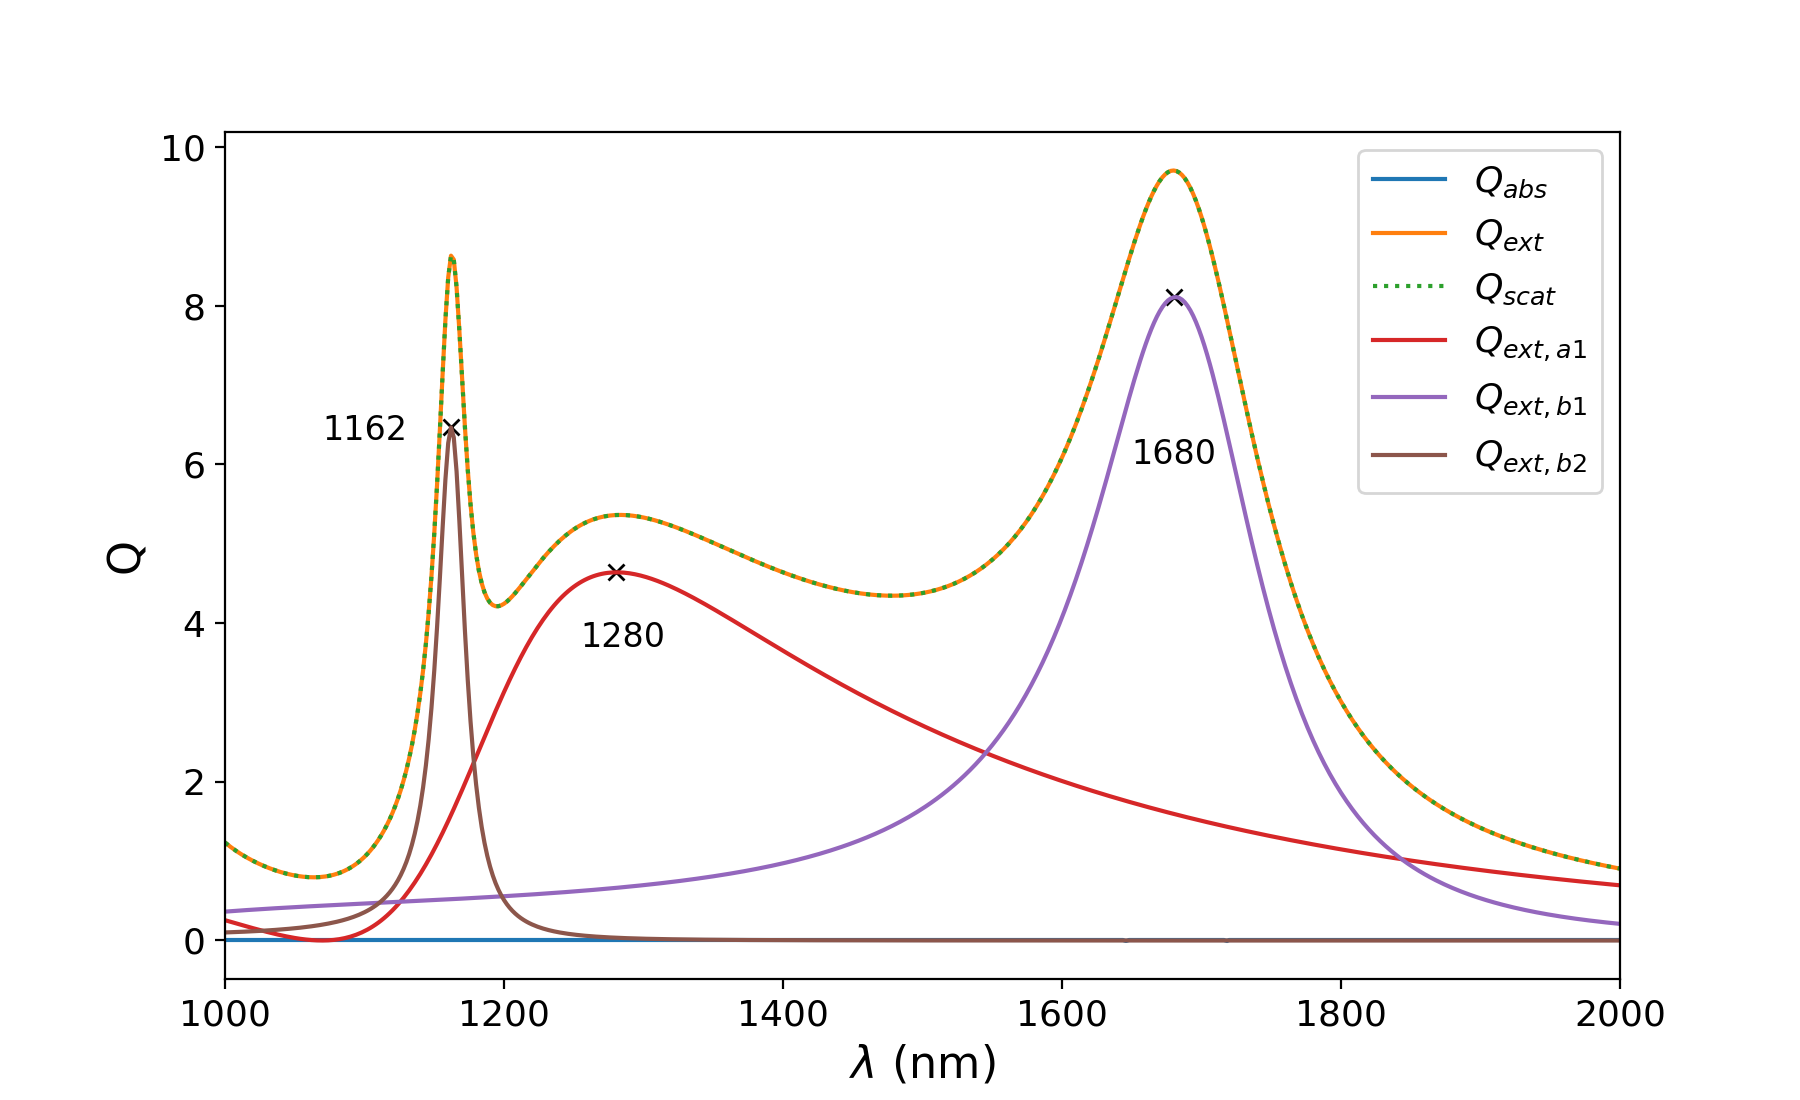

In [5]:
fig, ax = plt.subplots(figsize = (9, 5.5))

ax.plot(mie.cross_sections.index*1E9,mie.cross_sections['Qabs'], label='$Q_{abs}$')
ax.plot(1280, 4.638582, marker = 'x', color = 'black')
ax.plot(1680, 8.105445, marker = 'x', color = 'black')
ax.plot(1162, 6.464978, marker = 'x', color = 'black')
ax.plot(mie.cross_sections.index*1E9,mie.cross_sections['Qext'], label='$Q_{ext}$')
ax.plot(mie.cross_sections.index*1E9,mie.cross_sections['Qscat'], label='$Q_{scat}$', linestyle=':')
ax.plot(mie.expanded_Qext.index*1E9,mie.expanded_Qext['Qext_a1'], label='$Q_{ext, a1}$')
ax.plot(mie.expanded_Qext.index*1E9,mie.expanded_Qext['Qext_b1'], label='$Q_{ext, b1}$')
ax.plot(mie.expanded_Qext.index*1E9,mie.expanded_Qext['Qext_b2'], label='$Q_{ext, b2}$')
ax.set_xlabel('$\lambda$ (nm)', fontsize=16)
ax.set_ylabel('Q', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.legend(fontsize=13)
#plt.title('Cross Sections', fontsize=14)
plt.xlim(1000, 2000)
plt.text(1255,3.7, '1280', fontsize = 12)
plt.text(1650,6, '1680', fontsize = 12)
plt.text(1070,6.3, '1162', fontsize = 12)
plt.savefig('Cross_Sections.png', dpi = 300, transparent = True)

<IPython.core.display.Javascript object>


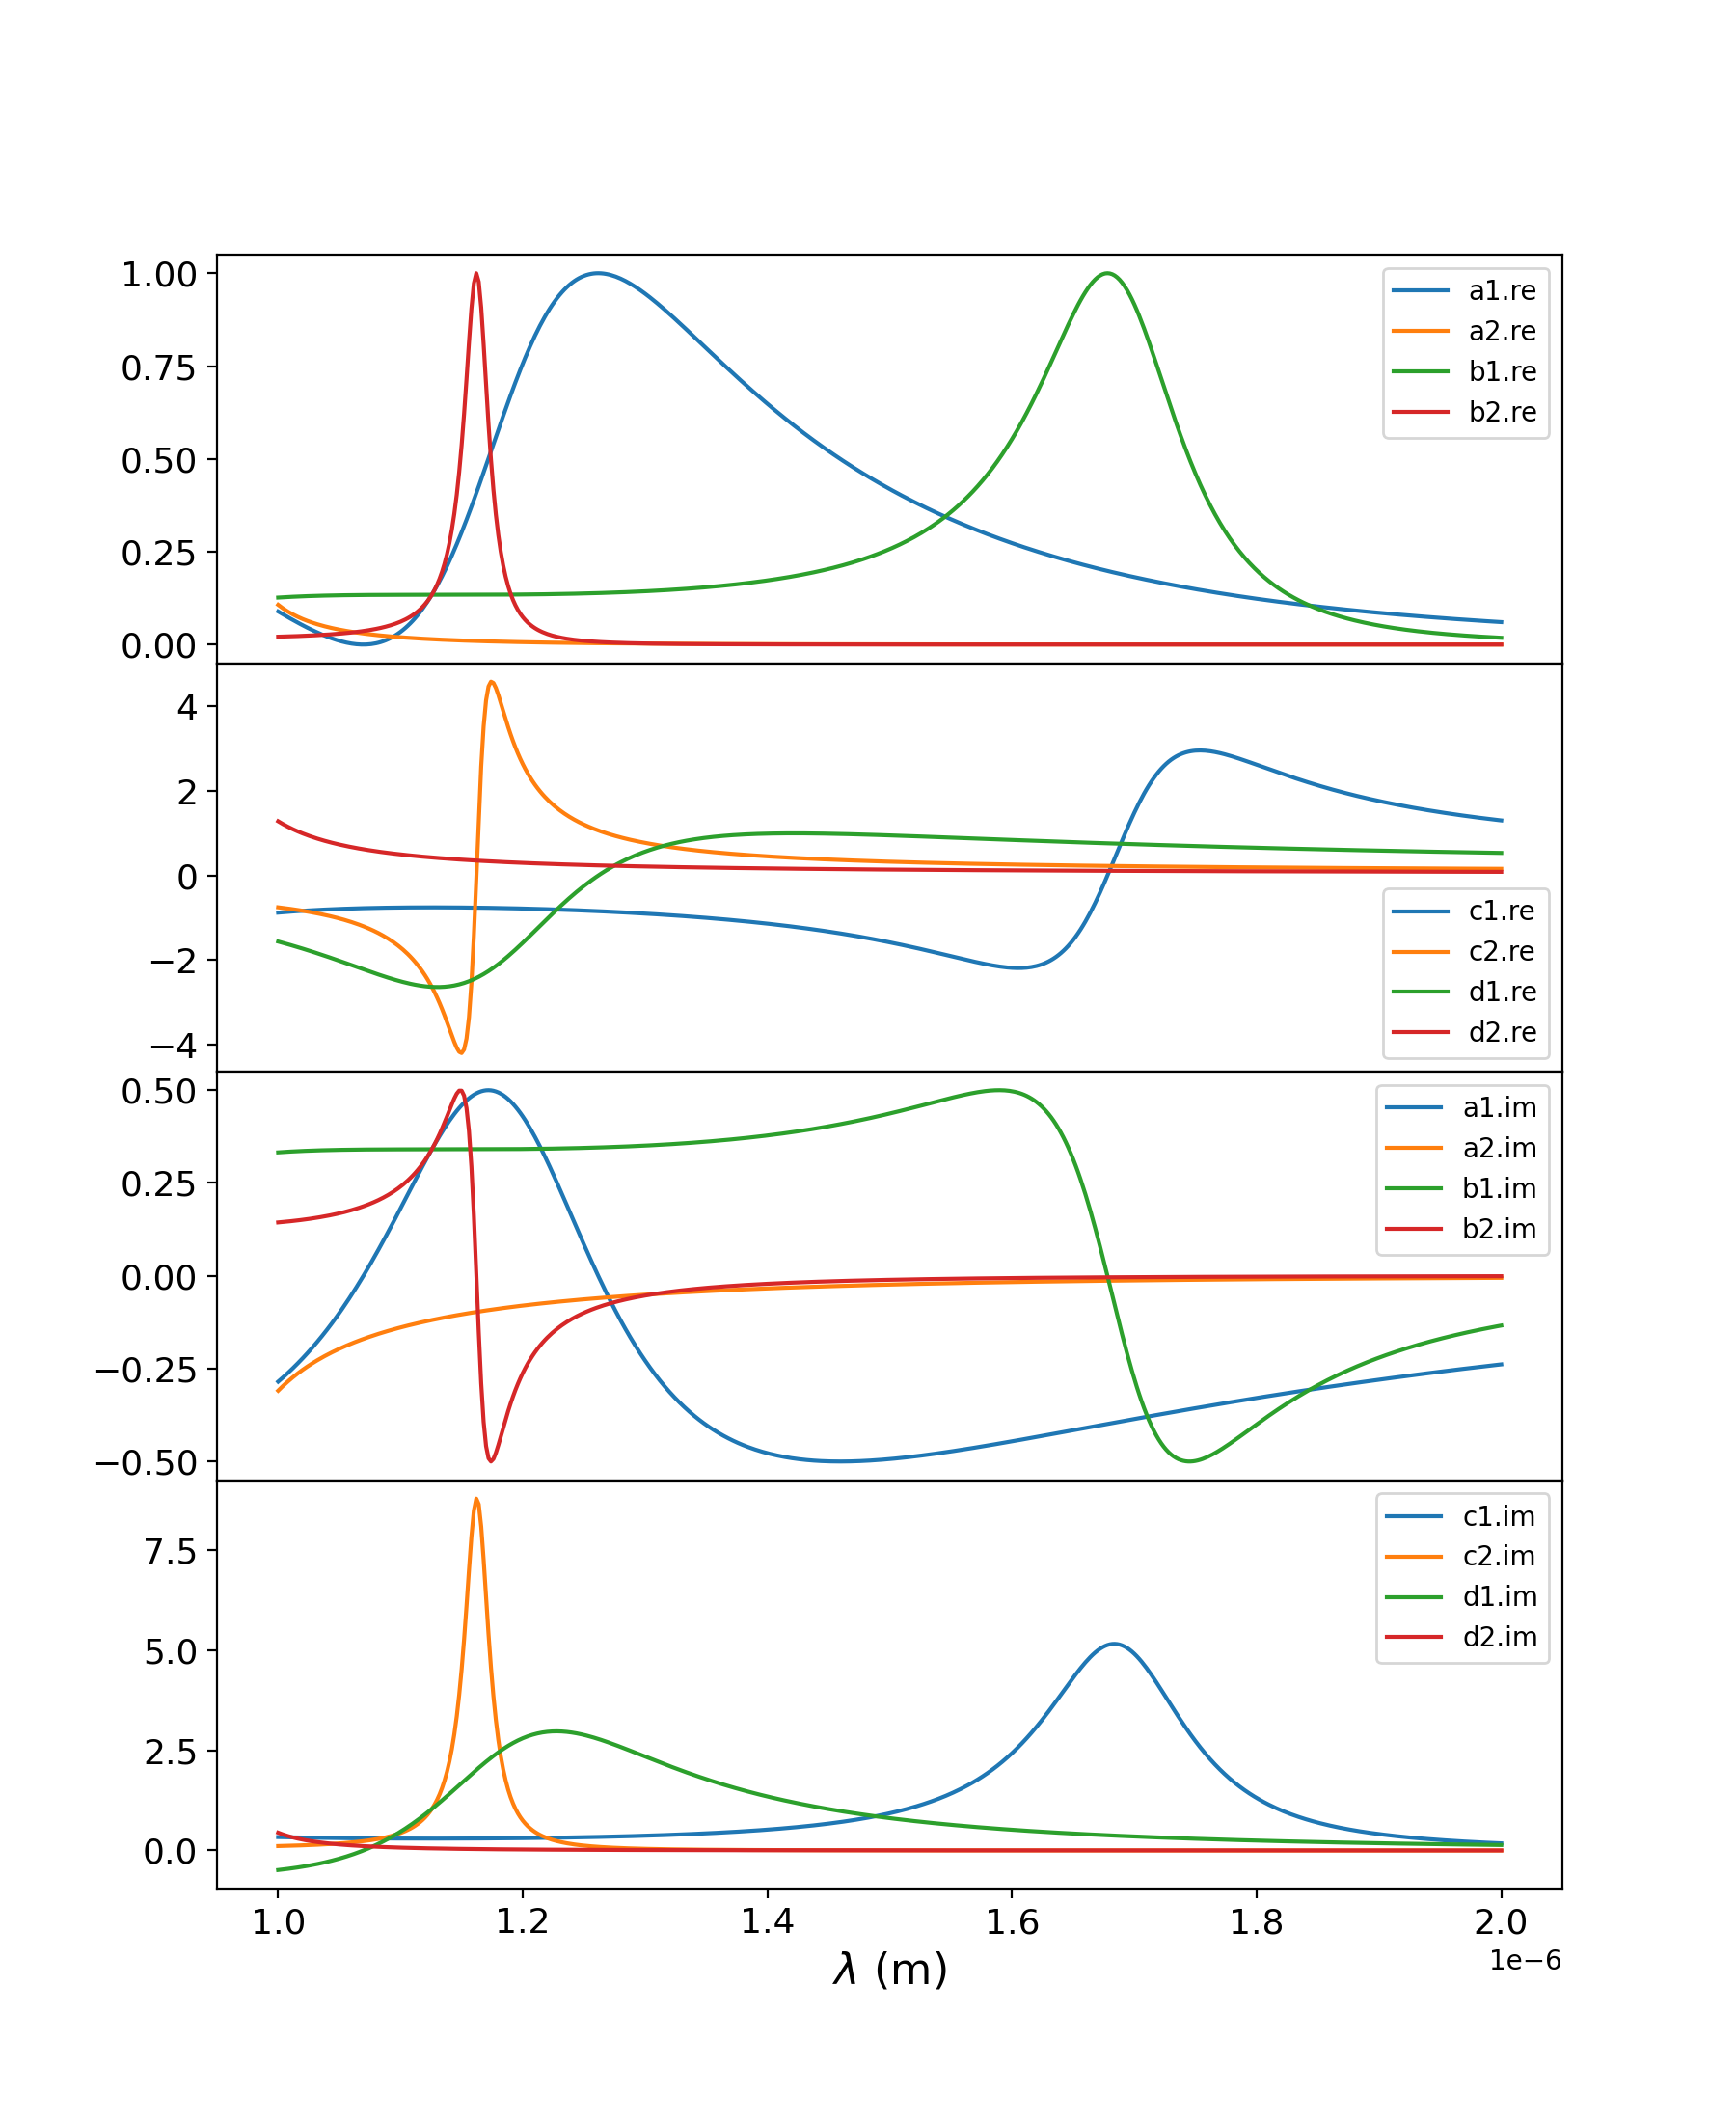

In [6]:
fig, ax = plt.subplots(nrows = 4, figsize = (9, 11), sharex = True)

ax[0].plot(mie.coeffs.index, np.real(mie.coeffs['a1'].to_numpy()), label = 'a1.re')
ax[0].plot(mie.coeffs.index, np.real(mie.coeffs['a2'].to_numpy()), label = 'a2.re')
ax[0].plot(mie.coeffs.index, np.real(mie.coeffs['b1'].to_numpy()), label = 'b1.re')
ax[0].plot(mie.coeffs.index, np.real(mie.coeffs['b2'].to_numpy()), label = 'b2.re')
ax[1].plot(mie.coeffs.index, np.real(mie.coeffs['c1'].to_numpy()), label = 'c1.re')
ax[1].plot(mie.coeffs.index, np.real(mie.coeffs['c2'].to_numpy()), label = 'c2.re')
ax[1].plot(mie.coeffs.index, np.real(mie.coeffs['d1'].to_numpy()), label = 'd1.re')
ax[1].plot(mie.coeffs.index, np.real(mie.coeffs['d2'].to_numpy()), label = 'd2.re')
ax[2].plot(mie.coeffs.index, np.imag(mie.coeffs['a1'].to_numpy()), label = 'a1.im')
ax[2].plot(mie.coeffs.index, np.imag(mie.coeffs['a2'].to_numpy()), label = 'a2.im')
ax[2].plot(mie.coeffs.index, np.imag(mie.coeffs['b1'].to_numpy()), label = 'b1.im')
ax[2].plot(mie.coeffs.index, np.imag(mie.coeffs['b2'].to_numpy()), label = 'b2.im')
ax[3].plot(mie.coeffs.index, np.imag(mie.coeffs['c1'].to_numpy()), label = 'c1.im')
ax[3].plot(mie.coeffs.index, np.imag(mie.coeffs['c2'].to_numpy()), label = 'c2.im')
ax[3].plot(mie.coeffs.index, np.imag(mie.coeffs['d1'].to_numpy()), label = 'd1.im')
ax[3].plot(mie.coeffs.index, np.imag(mie.coeffs['d2'].to_numpy()), label = 'd2.im')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

ax[3].set_xlabel('$\lambda$ (m)', fontsize=16)
ax[0].set_ylabel('', fontsize=16)
ax[1].set_ylabel('', fontsize=16)
ax[2].set_ylabel('', fontsize=16)
ax[3].set_ylabel('', fontsize=16)

ax[0].tick_params(axis='both', which='major', labelsize=13)
ax[1].tick_params(axis='both', which='major', labelsize=13)
ax[2].tick_params(axis='both', which='major', labelsize=13)
ax[3].tick_params(axis='both', which='major', labelsize=13)
plt.subplots_adjust(hspace=0.)